In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# example of loading the cifar10 dataset
from matplotlib import pyplot
from keras.datasets import mnist
from keras.utils import to_categorical

from neuron_layer import NeuronLayer
from activation_layers import RecluActivation,SoftmaxActivation,SigmoidActivation
from neural_network import NeuralNetwork

network = NeuralNetwork()
network.add_layer(NeuronLayer(28*28,50))
network.add_layer(RecluActivation())
network.add_layer(NeuronLayer(50,25))
network.add_layer(RecluActivation())
network.add_layer(NeuronLayer(25,15))
network.add_layer(RecluActivation())
network.add_layer(NeuronLayer(15,10))
network.add_layer(SigmoidActivation())

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 1, 28*28)
x_train = x_train.astype('float32')
x_train /= 255
y_train = to_categorical(y_train)

x_test = x_test.reshape(x_test.shape[0], 1, 28*28)
x_test = x_test.astype('float32')
x_test /= 255
y_test = to_categorical(y_test)

average_loss_data = network.train(x_train[0:30000], y_train[0:30000], 50, 0.1)
print(average_loss_data)

2023-11-23 22:52:06.042766: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/maxornstein/Documents/Back Propagation/.venv/lib/python3.8/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Epoch 1/50: Average Loss 0.03158462019804657
Epoch 2/50: Average Loss 0.014060715611648494
Epoch 3/50: Average Loss 0.011184998614150862
Epoch 4/50: Average Loss 0.009481613430923701
Epoch 5/50: Average Loss 0.00869033631296984
Epoch 6/50: Average Loss 0.007829964668127213
Epoch 7/50: Average Loss 0.007198873338081753
Epoch 8/50: Average Loss 0.006749981491553749
Epoch 9/50: Average Loss 0.006269376848756165
Epoch 10/50: Average Loss 0.006021126342539381
Epoch 11/50: Average Loss 0.005656879097927258
Epoch 12/50: Average Loss 0.0052499028785307905
Epoch 13/50: Average Loss 0.005014707929297052
Epoch 14/50: Average Loss 0.004944128059003183
Epoch 15/50: Average Loss 0.0047360787537042886
Epoch 16/50: Average Loss 0.004640905941750269
Epoch 17/50: Average Loss 0.004380878222634829
Epoch 18/50: Average Loss 0.004381505596959504
Epoch 19/50: Average Loss 0.00419311653995898
Epoch 20/50: Average Loss 0.003953520073051067
Epoch 21/50: Average Loss 0.00379761660410597
Epoch 22/50: Average Los

[0.03158462019804657, 0.014060715611648494, 0.011184998614150862, 0.009481613430923701, 0.00869033631296984, 0.007829964668127213, 0.007198873338081753, 0.006749981491553749, 0.006269376848756165, 0.006021126342539381, 0.005656879097927258, 0.0052499028785307905, 0.005014707929297052, 0.004944128059003183, 0.0047360787537042886, 0.004640905941750269, 0.004380878222634829, 0.004381505596959504, 0.00419311653995898, 0.003953520073051067, 0.00379761660410597, 0.003677436115904456, 0.003576743879066243, 0.0034663137038214334, 0.0035116071113537664, 0.0033816119228601707, 0.003534435936475471, 0.0033258108435300785, 0.003083583705943681, 0.0032017722672933744, 0.003267657137436833, 0.00308538728548561, 0.002873075125449441, 0.0029752939733565156, 0.0027760564282692333, 0.0027992136596134446, 0.0031370675073722565, 0.002926586560534293, 0.003019892131456201, 0.00305971254858074, 0.002984357102291973, 0.0030831297744985274, 0.0029372962507957733, 0.002992347296657607, 0.0029748770323838078, 0

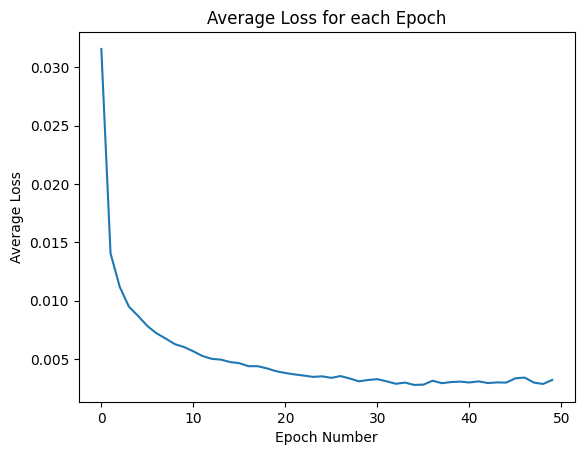

In [2]:
print(average_loss_data)

plt.plot(np.array(average_loss_data))
plt.xlabel('Epoch Number')
plt.ylabel('Average Loss')
plt.title('Average Loss for each Epoch')

plt.show()

In [ ]:
for i in range(20,30):

    first_image = np.array(x_test[i], dtype='float')
    pixels = first_image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()

    output = network.forward(x_test[i])

    predicted_digit = np.argmax(output)
    print(predicted_digit)
    

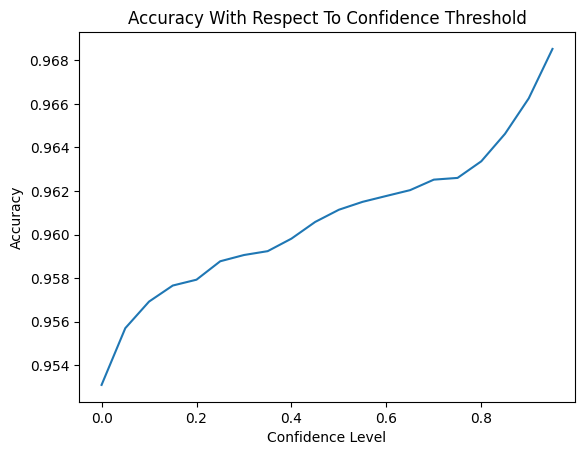

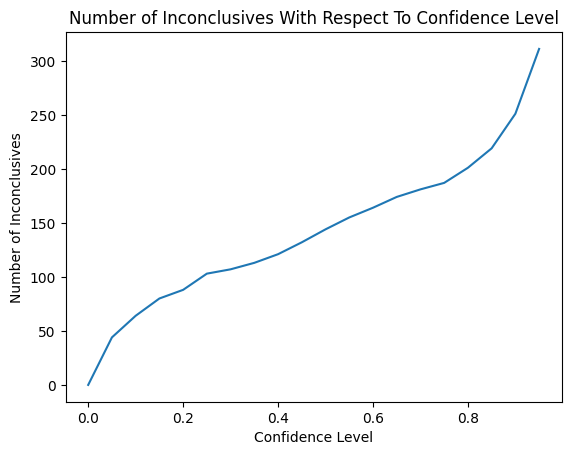

In [9]:
confidence_level_array = []
percent_array = [] 
inconclusive_array = []

confidence_level = 0.0

for confidence_level in range(0,20):

    confidence_level = confidence_level/20.0

    correct = 0
    total = 0
    inconclusive = 0

    for i in range(10000):

        output = network.forward(x_test[i])
        true_value = y_test[i]

        if np.max(output) >= confidence_level:
            total +=1
    
            if np.argmax(output) == np.argmax(true_value):
                correct+=1

        else:
            inconclusive += 1

    percent = (correct)/total

    confidence_level_array.append(confidence_level)
    percent_array.append(percent)
    inconclusive_array.append(inconclusive)


plt.plot( np.array(confidence_level_array), np.array(percent_array))
plt.xlabel('Confidence Level')
plt.ylabel('Accuracy')
plt.title('Accuracy With Respect To Confidence Threshold')

plt.show()

plt.plot( np.array(confidence_level_array), np.array(inconclusive_array))
plt.xlabel('Confidence Level')
plt.ylabel('Number of Inconclusives')
plt.title('Number of Inconclusives With Respect To Confidence Level')

plt.show()



In [10]:
correct_1 = 0

for i in range(10000):

    output = network.forward(x_test[i])
    true_value = y_test[i]

    if np.argmax(output) == np.argmax(true_value):
        correct_1 +=1

print(correct_1/10000.0)



0.9531
